Dataset Shape: (1461, 6)
First 5 rows of dataset:
         date  precipitation  temp_max  temp_min  wind weather
0  2012-01-01            7.5      24.5      15.4   5.7  cloudy
1  2012-01-02           19.0       8.2      -0.5   8.8    rain
2  2012-01-03           14.6      24.7       4.3   5.6    rain
3  2012-01-04           12.0      35.0      17.5   9.6    rain
4  2012-01-05            3.1       6.4      15.2   0.5  cloudy
Accuracy: 0.9931740614334471

Classification Report (Modified):
               precision    recall  f1-score   specificity

           0       0.98      1.00      0.99        91
           1       1.00      0.93      0.97        30
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00        26

    accuracy                           0.99       293
   macro avg       0.99      0.98      0.99       293
weighted avg       0.99      0.99      0.99       293

Label Mapping: {'cloudy': 0, 'fog': 1, 'rain': 2, 'sunny': 3}


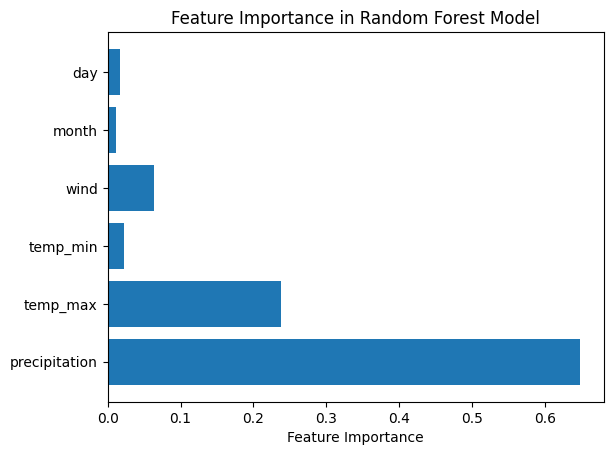

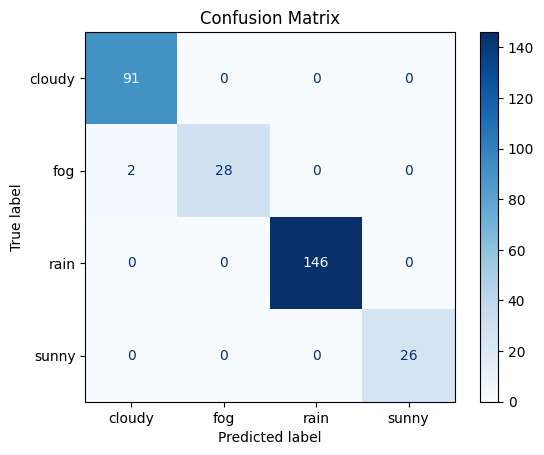

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 20}
Best cross-validation score:  0.9965775283371849
Enter date (YYYY-MM-DD): 2012-01-01
Enter precipitation: 7.5
Enter max temperature: 24.5
Enter min temperature: 15.4
Enter wind speed: 5.7
Predicted Weather Category: cloudy


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# Load the dataset
data = pd.read_csv('/content/seattle_weather.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("First 5 rows of dataset:")
print(data.head())

# Data Preprocessing
# Drop rows with missing values if any
data = data.dropna()

# Encode the 'weather' column if it is categorical
label_encoder = LabelEncoder()
data['weather'] = label_encoder.fit_transform(data['weather'])

# Convert date to datetime and extract useful information if needed
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the date column as it may not be useful directly
data = data.drop(['date'], axis=1)

# Step 2: Splitting Data into Training and Testing Sets
X = data.drop('weather', axis=1)  # Features
y = data['weather']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate classification report
report = classification_report(y_test, y_pred)

# Replace "support" with "specifying"
report_modified = report.replace("support", "specificity")

# Print modified classification report
print("\nClassification Report (Modified):\n", report_modified)

# Step 5: Visualize Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

# Get the mapping of encoded values to original weather categories
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Feature Importance
importances = model.feature_importances_
feature_names = model.feature_names_in_

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Function to predict weather based on user input
def predict_weather(model):
    # Gather user input
    date_input = input("Enter date (YYYY-MM-DD): ")
    precipitation = float(input("Enter precipitation: "))
    temp_max = float(input("Enter max temperature: "))
    temp_min = float(input("Enter min temperature: "))
    wind = float(input("Enter wind speed: "))

    # Create a DataFrame from the input
    new_data = pd.DataFrame({
        'precipitation': [precipitation],
        'temp_max': [temp_max],
        'temp_min': [temp_min],
        'wind': [wind]
    })

    # Preprocess the date to extract day and month
    new_data['day'] = pd.to_datetime(date_input).day
    new_data['month'] = pd.to_datetime(date_input).month

    # Ensure columns are in the correct order
    new_data = new_data[model.feature_names_in_]

    # Make prediction
    predicted_weather = model.predict(new_data)

    # Map numerical predictions back to weather labels
    predicted_label = list(label_mapping.keys())[predicted_weather[0]]

    print("Predicted Weather Category:", predicted_label)

# Call the function to predict
predict_weather(model)
